In [2]:
import torch
import numpy as np
import numpy.linalg as la
from scipy.optimize import minimize
import sys
import matplotlib.pyplot as plt

In [18]:
device = torch.device("cuda:0")


n = 50

kappa = 100
des = np.random.uniform(low = 1, high = kappa, size = n) 
des = 1 + (kappa - 1) * (des - min(des)) / (max(des) - min(des))
s = np.diag(des)
q, _ = la.qr(np.random.rand(n, n))
A = np.array([q.T @ s @ q]).squeeze()

In [19]:
scale = 2

def phi(x):
    return x @ A @ x

def noisy_phi(x):
    xi = np.random.normal(0, scale)
    xi = torch.tensor(xi).to(device)
    return phi(x) + xi

def grad(z, tau, e):
    return n * (noisy_phi(z + tau * e) - noisy_phi(z - tau * e)) / (2 * tau) * e

def step(x_prev, gamma, tau, batch_size):
    g = np.zeros(n)
    for _ in range(batch_size):
        e = np.random.normal(0, 1, n)
        e /= la.norm(e, 2)
        e = torch.tensor(e).to(device)
        g += grad(x_prev, tau, e)
        
    g /= batch_size
    return x_prev - gamma * g

In [20]:
x0 = np.random.uniform(low = -100, high = 100, size = n)
z = minimize(phi, x0)
print("func: {:.2e}".format(z.fun))
print(z.x)

mu = min(la.eig(A)[0])
L = max(la.eig(A)[0])

print('mu = {:.2f}, L = {:.2f}'.format(mu, L))

func: 1.10e-12
[-1.34182547e-07 -9.72786609e-08  1.15665674e-07  1.19424371e-08
 -9.56995083e-08  1.87948061e-07 -6.75746669e-08 -5.24731363e-08
 -9.18484841e-08 -2.32687043e-07  9.52016703e-08 -1.36910980e-07
  1.85219827e-07 -1.51179952e-07 -2.00253608e-08 -2.43340634e-07
 -4.92811922e-08 -1.72551796e-07  1.70443940e-07 -1.47516657e-07
  7.04512892e-09 -3.90097560e-08 -1.11245682e-07  7.85520214e-08
 -8.85654583e-08 -1.12581731e-07  1.19771165e-07  1.38438698e-07
 -2.07739249e-07 -1.43252822e-07 -1.74786474e-08  1.07954353e-07
 -1.13886458e-08 -9.44912653e-08  4.43292726e-08 -5.64190205e-08
 -6.62584725e-08  1.37976846e-07 -7.43825093e-08 -7.88136499e-08
 -1.57132949e-07  1.87500707e-09  1.67960273e-07 -1.14883433e-07
 -1.19134806e-07  7.86042161e-08 -4.67815687e-08 -1.88843263e-08
 -1.30562247e-07 -2.01782503e-07]
mu = 1.00, L = 100.00


In [21]:
x_prev = torch.tensor(x0).to(device)
A = torch.tensor(A).to(device)

N = 100000
alpha = 0.8
beta = 1


errors = []


for k in range(N):
    gamma = 0.0001
    tau = 0.01
    batch_size = 10
    x_next = step(x_prev, gamma, tau, batch_size)
    err = la.norm(x_next - z.x, 2)
    errors.append(err)
    if k % 1000 == 0:
        sys.stdout.write("\r %d. error %.3e" % (k, err))
    x_prev = x_next
    

TypeError: unsupported operand type(s) for +=: 'numpy.ndarray' and 'Tensor'

In [ ]:
x = range(N)
plt.plot(x, errors)
plt.xlabel("iteration")
plt.ylabel("error")
plt.grid()
plt.show()

In [243]:
noisy_phi(x_next)

12879.73454292986

In [244]:
errors[-1]

22.026919600840937

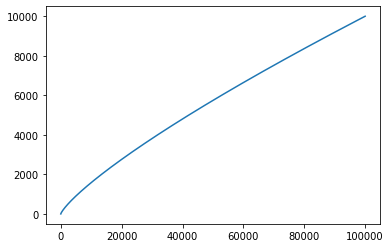

In [210]:
x = np.arange(0, N)
y = x ** alpha

plt.plot(x,y)